## Importing Dependencies

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Dataset from csv file into DataFrame

In [ ]:
matches = pd.read_csv('/content/drive/Shareddrives/AML/Project IPL/Win Probability predictor/matches.csv')
deliveries = pd.read_csv('/content/drive/Shareddrives/AML/Project IPL/Win Probability predictor/deliveries.csv')

#### Taking a look at our Matches data

In [ ]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


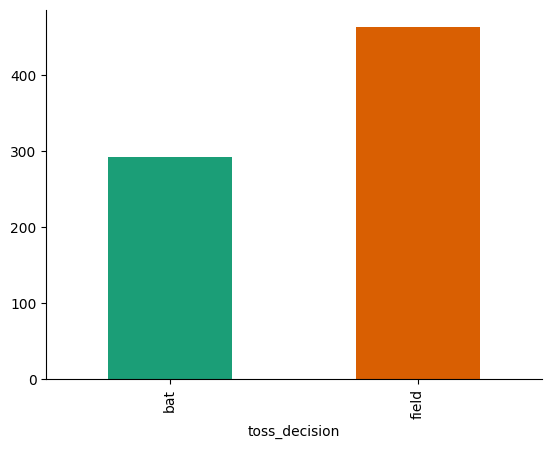

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
matches.groupby('toss_decision').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

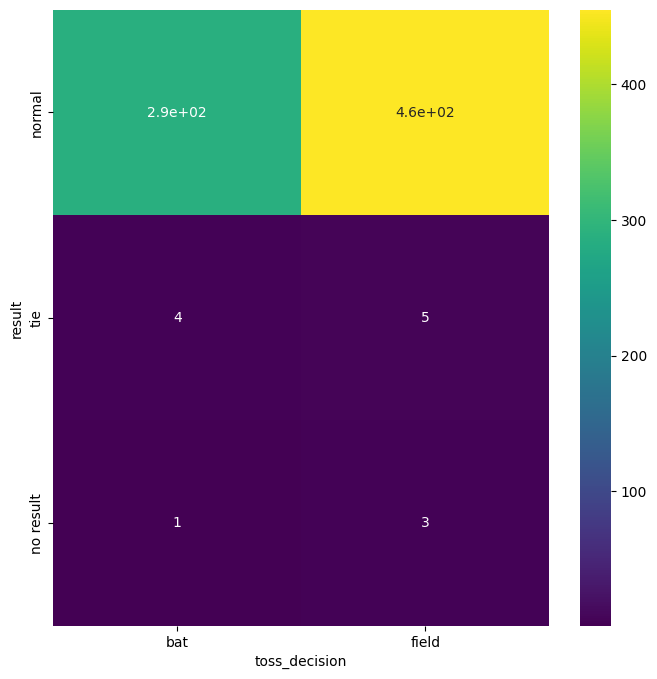

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['result'].value_counts()
    for x_label, grp in matches.groupby('toss_decision')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True)
plt.xlabel('toss_decision')
_ = plt.ylabel('result')

In [ ]:
matches['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [ ]:
matches.shape

(756, 18)

#### Taking a look at our Deliviers data

In [ ]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


##### Shortening our data to only the columns we need


In [ ]:
total_score_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
inning_2 = total_score_df[total_score_df['inning'] == 2]
inning_2

,match_id,inning,total_runs
1,1,2,172
3,2,2,187
5,3,2,184
7,4,2,164
9,5,2,142
...,...,...,...
1519,11347,2,137
1521,11412,2,140
1523,11413,2,170
1525,11414,2,162


In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


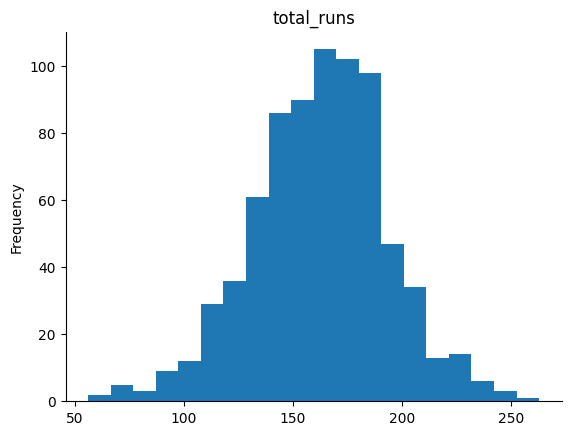

In [ ]:
total_score_df['total_runs'].plot(kind='hist', bins=20, title='total_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

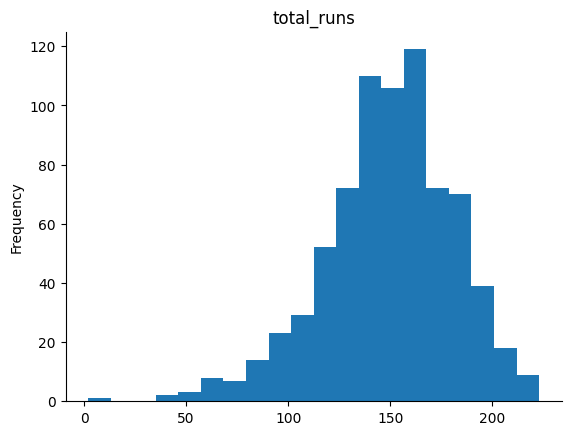

In [ ]:
inning_2['total_runs'].plot(kind='hist', bins=20, title='total_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### Adding match totals to the matches df

In [ ]:
match_df = matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(641, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

##### Merging both datasets Matches and Deliveries

In [ ]:
delivery_df = match_df.merge(deliveries,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


#### Feature Engineering

In [ ]:
delivery_df['match_id'] = delivery_df['match_id'].astype(int)


##### Creating a column  

* current score(indicates the running total of score after every ball),
* remaining score(indicates the remaining runs to be scored after every ball
* balls left
* drop of wickets



In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


##### Engineering columns Current Run Rate & Required Run Rate

In [ ]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
delivery_df.isna().sum()

match_id                0
city                  832
winner                 27
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed        0
dismissal_kind      68860
fielder             69855
current_score           0
runs_left               0
balls_left              0
wickets                 0
crr                     0
rrr                     7
dtype: int64

#### Defining Predictor Variable (result)

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

### Generating final_df for EDA and ML model on

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
55040,Rajasthan Royals,Chennai Super Kings,Jaipur,72,20,5,196,7.44,21.6,0


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
92462,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,92,62,10,170,8.068966,8.903226,0
119930,Delhi Daredevils,Mumbai Indians,Visakhapatnam,170,97,9,206,9.391304,10.515464,0
3701,Kolkata Knight Riders,Delhi Daredevils,Kolkata,156,115,10,160,4.800000,8.139130,1
25477,Delhi Daredevils,Chennai Super Kings,Johannesburg,110,79,7,163,7.756098,8.354430,0
18744,Deccan Chargers,Royal Challengers Bangalore,Bangalore,67,49,8,156,7.521127,8.204082,0
...,...,...,...,...,...,...,...,...,...,...
120954,Royal Challengers Bangalore,Delhi Daredevils,Raipur,50,48,7,138,7.333333,6.250000,1
86728,Mumbai Indians,Kolkata Knight Riders,Abu Dhabi,146,99,10,163,4.857143,8.848485,0
123378,Delhi Daredevils,Mumbai Indians,Mumbai,64,34,7,204,9.767442,11.294118,1
94138,Chennai Super Kings,Mumbai Indians,Mumbai,145,113,10,157,10.285714,7.699115,1


In [ ]:
final_df = final_df[final_df['balls_left'] != 0]


In [ ]:
final_df.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,92.621065,62.878725,7.553251,165.726963,7.447791,10.368308,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,13.726365,0.499293
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,6.000000,147.000000,6.265782,7.151515,0.000000
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.880000,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.696385,10.894737,1.000000
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000,1.000000


The final DF

In [ ]:
final_df.head(10)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
92462,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,92,62,10,170,8.068966,8.903226,0
119930,Delhi Daredevils,Mumbai Indians,Visakhapatnam,170,97,9,206,9.391304,10.515464,0
3701,Kolkata Knight Riders,Delhi Daredevils,Kolkata,156,115,10,160,4.800000,8.139130,1
25477,Delhi Daredevils,Chennai Super Kings,Johannesburg,110,79,7,163,7.756098,8.354430,0
18744,Deccan Chargers,Royal Challengers Bangalore,Bangalore,67,49,8,156,7.521127,8.204082,0
100394,Chennai Super Kings,Kings XI Punjab,Mumbai,143,87,8,226,15.090909,9.862069,0
53077,Kolkata Knight Riders,Kings XI Punjab,Kolkata,17,30,8,119,6.800000,3.400000,1
11433,Kolkata Knight Riders,Rajasthan Royals,Jaipur,193,116,10,196,4.500000,9.982759,0
29536,Royal Challengers Bangalore,Chennai Super Kings,Durban,117,110,9,129,7.200000,6.381818,1
28142,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,88,53,6,157,6.179104,9.962264,0


#### EDA

<ipython-input-247-356d6758917a>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=final_df.sort_index(),


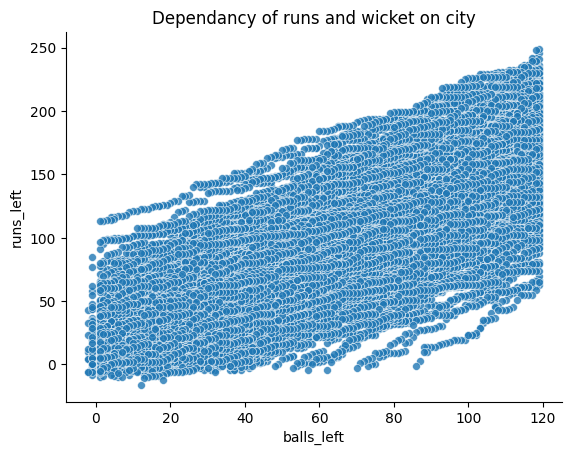

In [ ]:
sns.scatterplot(data=final_df.sort_index(),
                x='balls_left',
                y='runs_left',
                palette='Set2',
                s=32,
                alpha=.8)

plt.title('Dependancy of runs and wicket on city')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

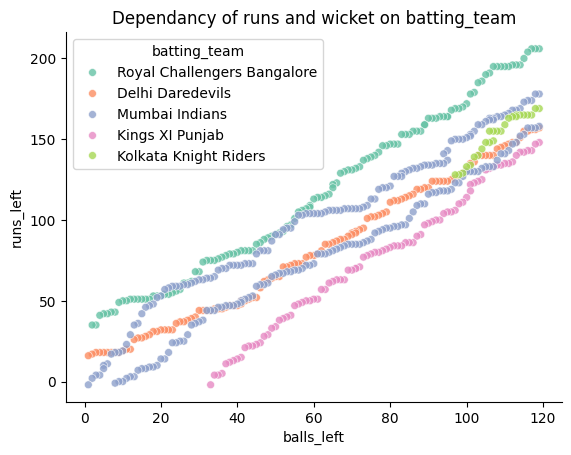

In [ ]:
sns.scatterplot(data=final_df.sort_index()[:120*5],
                x='balls_left',
                y='runs_left',
                hue='batting_team',
                palette='Set2',
                s=32,
                alpha=.8)

plt.title('Dependancy of runs and wicket on batting_team')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

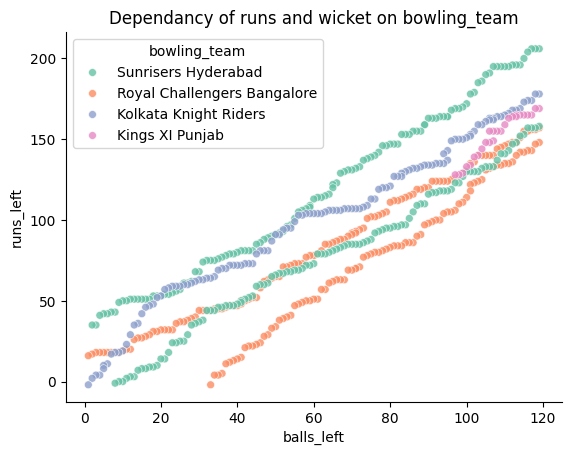

In [ ]:
sns.scatterplot(data=final_df.sort_index()[:120*5],
                x='balls_left',
                y='runs_left',
                hue='bowling_team',
                palette='Set2',  # Choose a palette for the colors
                s=32,
                alpha=.8)
plt.title('Dependancy of runs and wicket on bowling_team')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

In [ ]:
print(final_df['batting_team'].value_counts())
print('------------------------------------------')
print(final_df['bowling_team'].value_counts())
print('------------------------------------------')
print(final_df['city'].value_counts())


batting_team
Kolkata Knight Riders          9633
Royal Challengers Bangalore    9548
Mumbai Indians                 8911
Delhi Daredevils               8757
Kings XI Punjab                8545
Rajasthan Royals               8397
Chennai Super Kings            8342
Sunrisers Hyderabad            4430
Deccan Chargers                3617
Delhi Capitals                 1162
Name: count, dtype: int64
------------------------------------------
bowling_team
Mumbai Indians                 10541
Kings XI Punjab                 9358
Chennai Super Kings             9303
Royal Challengers Bangalore     8391
Kolkata Knight Riders           8117
Rajasthan Royals                7229
Delhi Daredevils                6864
Sunrisers Hyderabad             6254
Deccan Chargers                 4574
Delhi Capitals                   711
Name: count, dtype: int64
------------------------------------------
city
Mumbai            9874
Kolkata           7781
Delhi             7254
Hyderabad         6502
Chennai  

#### Correlation Matrix for features

<Axes: >

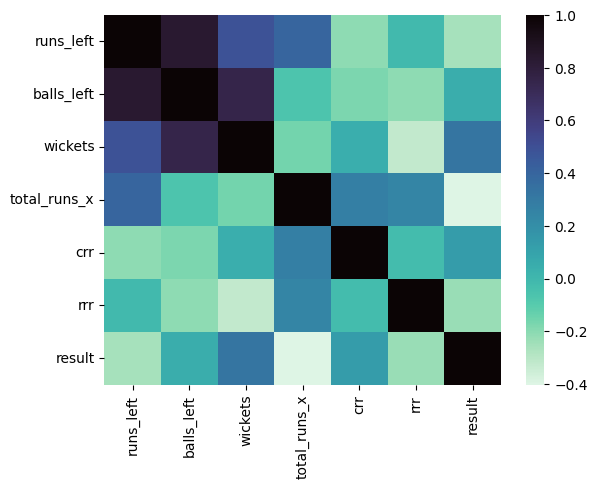

In [ ]:
sns.heatmap(final_df[['runs_left',	'balls_left',	'wickets',	'total_runs_x',	'crr',	'rrr', 'result']].corr(), cmap='mako_r')

<ipython-input-216-eedc83a19c91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["result"] = final_df["result"].replace({1:"Win",0:"Lose"})


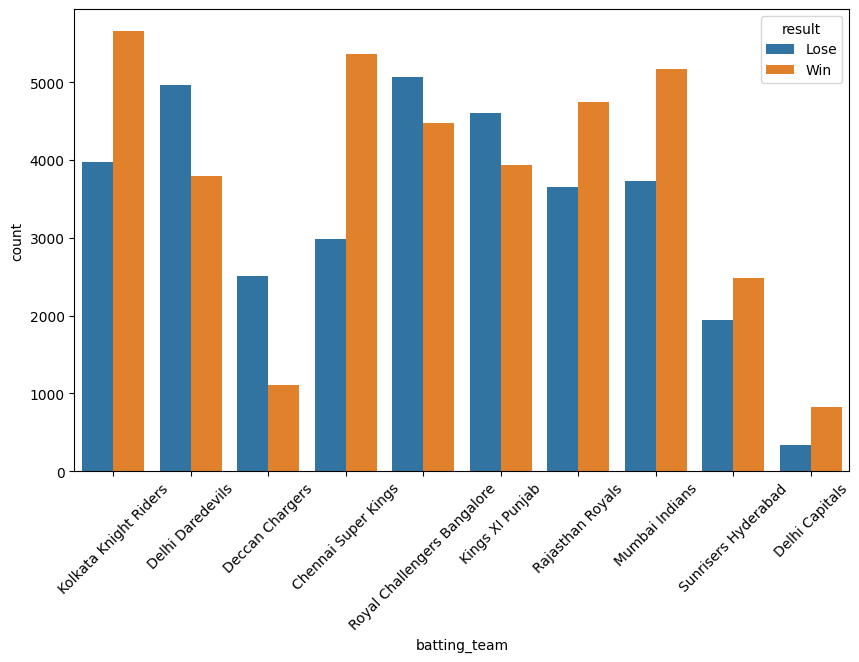

In [ ]:
final_df["result"] = final_df["result"].replace({1:"Win",0:"Lose"})
plt.figure(figsize=(10, 6))
sns.countplot(x='batting_team', data=final_df, hue = 'result')
plt.xticks(rotation=45)
plt.show()

In [ ]:
final_df["result"] = final_df["result"].replace({"Win":1,"Lose":0})
for column in final_df.columns:
    if final_df[column].dtype != 'object':
        correlation_coefficient, p_value = pearsonr(final_df[column], final_df['result'])
        print(f'Column: {column}, p-value: {p_value}')


Column: runs_left, p-value: 0.0
Column: balls_left, p-value: 6.632111012981088e-37
Column: wickets, p-value: 0.0
Column: total_runs_x, p-value: 0.0
Column: crr, p-value: 1.031041156063067e-277
Column: rrr, p-value: 0.0
Column: result, p-value: 0.0


<ipython-input-217-385226409af7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["result"] = final_df["result"].replace({"Win":1,"Lose":0})


In [ ]:
from scipy.stats import chi2_contingency


for column in final_df.columns:
    if final_df[column].dtype == 'object':
        contingency_table = pd.crosstab(final_df[column], final_df['result'])
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        print(f'Column: {column}, p-value: {p_val}')

Column: batting_team, p-value: 0.0
Column: bowling_team, p-value: 0.0
Column: city, p-value: 0.0


In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
46332,Chennai Super Kings,Kings XI Punjab,Dharamsala,113,69,8,192,9.294118,9.826087,1


In [ ]:
X = final_df.iloc[:,:-1]
y = final_df['result']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
140779,Chennai Super Kings,Kolkata Knight Riders,Chennai,63,66,8,114,5.666667,5.727273


In [ ]:
y_train.sample()

134940    0
Name: result, dtype: int64

In [ ]:
X_test.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
139615,Kings XI Punjab,Chennai Super Kings,Chennai,72,47,8,165,7.643836,9.191489


In [ ]:
y_test.sample()

84957    0
Name: result, dtype: int64

In [ ]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

### Dataframe finalized here. Can choose to add more columns into the dataframe. will need to do that work again.



In [ ]:
y_train

13764     0
91932     1
101093    0
98874     0
77064     1
         ..
18721     0
99110     1
48683     0
48293     1
14047     1
Name: result, Length: 57073, dtype: int64

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Constructing the pipeline for Linear Regression
pipe = Pipeline(steps=[
    ('step1', trf),  # Assuming trf is your feature transformation step
    ('step2', LinearRegression())
])


In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LinearRegression())])

In [ ]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
59396,Deccan Chargers,Chennai Super Kings,Visakhapatnam,172,102,10,193,7.000000,10.117647
100719,Kolkata Knight Riders,Kings XI Punjab,Bangalore,17,15,4,199,10.400000,6.800000
102672,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,43,36,8,166,8.785714,7.166667
39348,Deccan Chargers,Mumbai Indians,Mumbai,102,62,6,172,7.241379,9.870968
126331,Delhi Daredevils,Kings XI Punjab,Delhi,21,5,3,157,7.095652,25.200000
...,...,...,...,...,...,...,...,...,...
54985,Rajasthan Royals,Chennai Super Kings,Jaipur,134,72,8,196,7.750000,11.166667
64030,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,55,7,4,189,7.115044,47.142857
96671,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,23,17,7,142,6.932039,8.117647
134674,Rajasthan Royals,Kolkata Knight Riders,Kolkata,131,89,9,179,9.290323,8.831461


In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R²)
r_squared_linear = r2_score(y_test, y_pred)


In [ ]:
print("Linear Regression:")
print("Mean Absolute Error:", mae_linear)
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared (R²):", r_squared_linear)

Linear Regression:
Mean Absolute Error: 0.3244796187731554
Mean Squared Error: 0.14706890953736368
Root Mean Squared Error: 0.3834956447436707
R-squared (R²): 0.4104745454336066


##Logistic Regression

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='newton-cg'))
])

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='newton-cg'))])

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae_log = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse_log = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_log = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R²)
r_squared_log = r2_score(y_test, y_pred)

In [ ]:
print("Logistic Regression:")
print("Mean Absolute Error:", mae_log)
print("Mean Squared Error:", mse_log)
print("Root Mean Squared Error:", rmse_log)
print("R-squared (R²):", r_squared_log)

Logistic Regression:
Mean Absolute Error: 0.20001401639918706
Mean Squared Error: 0.20001401639918706
Root Mean Squared Error: 0.44722926603609814
R-squared (R²): 0.19824418153162227


In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:

def match_progression(x_df,match_id,pipe):
    matches = x_df[x_df['match_id'] == match_id]
    matches = matches[(matches['ball'] == 6)]
    temp_df = matches[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [ ]:
temp_df,target = match_progression(delivery_df,7,pipe)
target
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
629,1,9,0,48.0,52.0
635,2,5,0,48.5,51.5
643,3,9,0,42.4,57.6
650,4,6,0,41.0,59.0
658,5,15,0,27.3,72.7
664,6,4,0,28.7,71.3
671,7,10,0,22.9,77.1
677,8,13,1,25.5,74.5
683,9,1,1,45.7,54.3
689,10,2,1,66.1,33.9


Text(0.5, 1.0, 'Target-178')

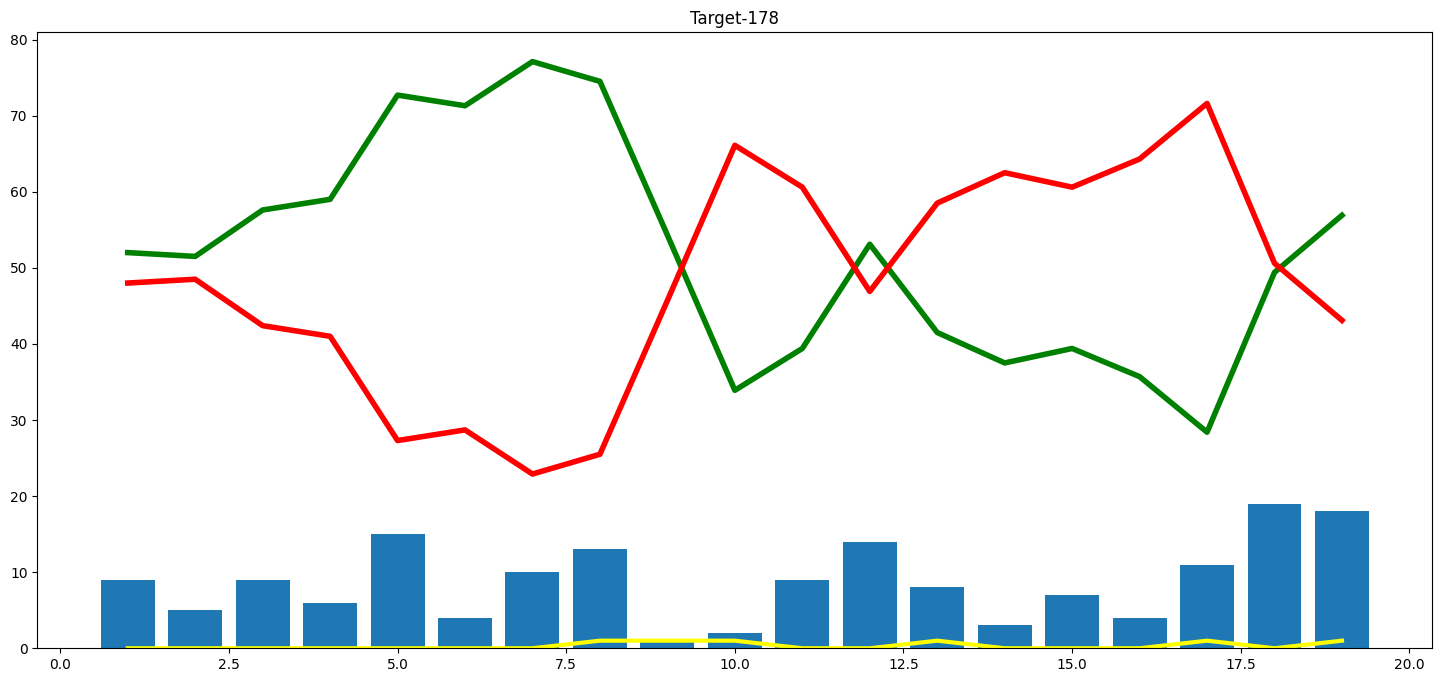

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'],color='yellow', linewidth=3)
plt.plot(temp_df['end_of_over'], temp_df['win'],color='green', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'],color='red', linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

Target- 230


Text(0.5, 1.0, 'Target-230')

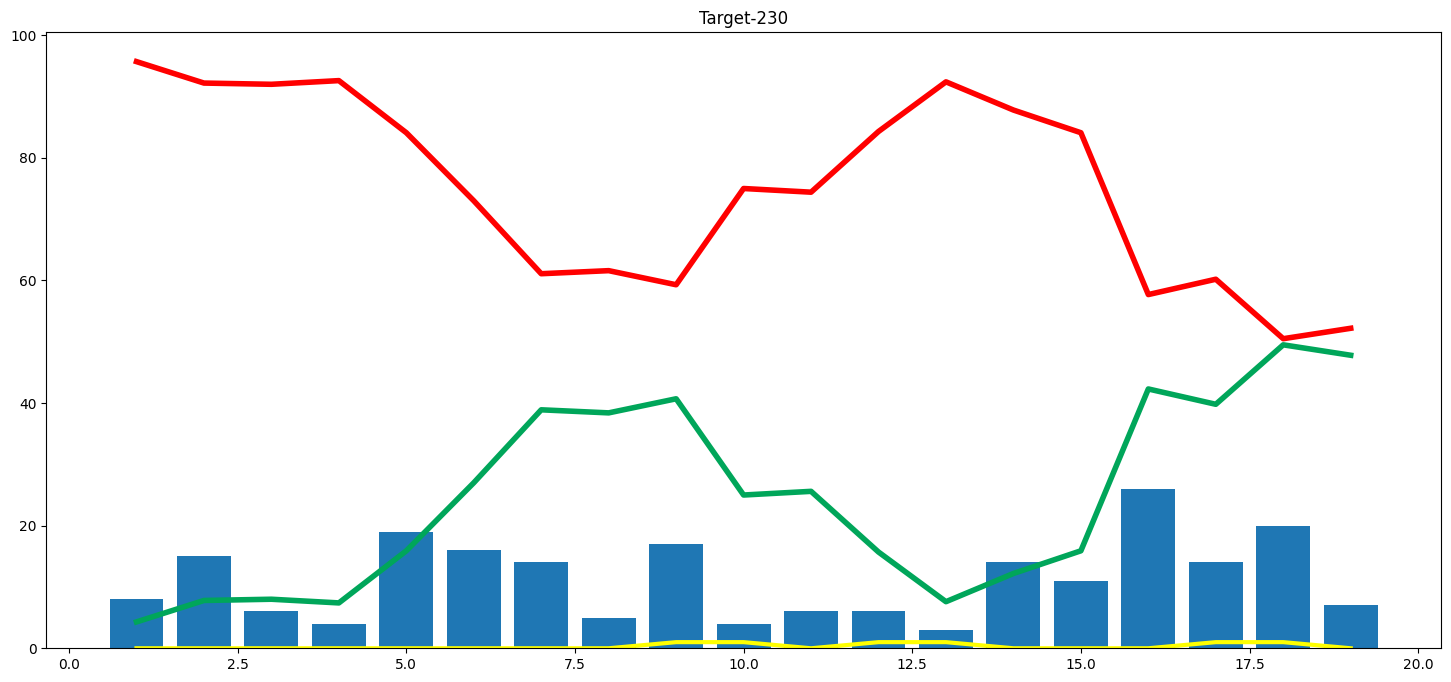

In [ ]:
temp_df,target = match_progression(delivery_df,50,pipe)
temp_df
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'],color='yellow', linewidth=3)
plt.plot(temp_df['end_of_over'], temp_df['win'],color='#00a65a', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'],color='red', linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))

Target- 178


Text(0.5, 1.0, 'Target-178')

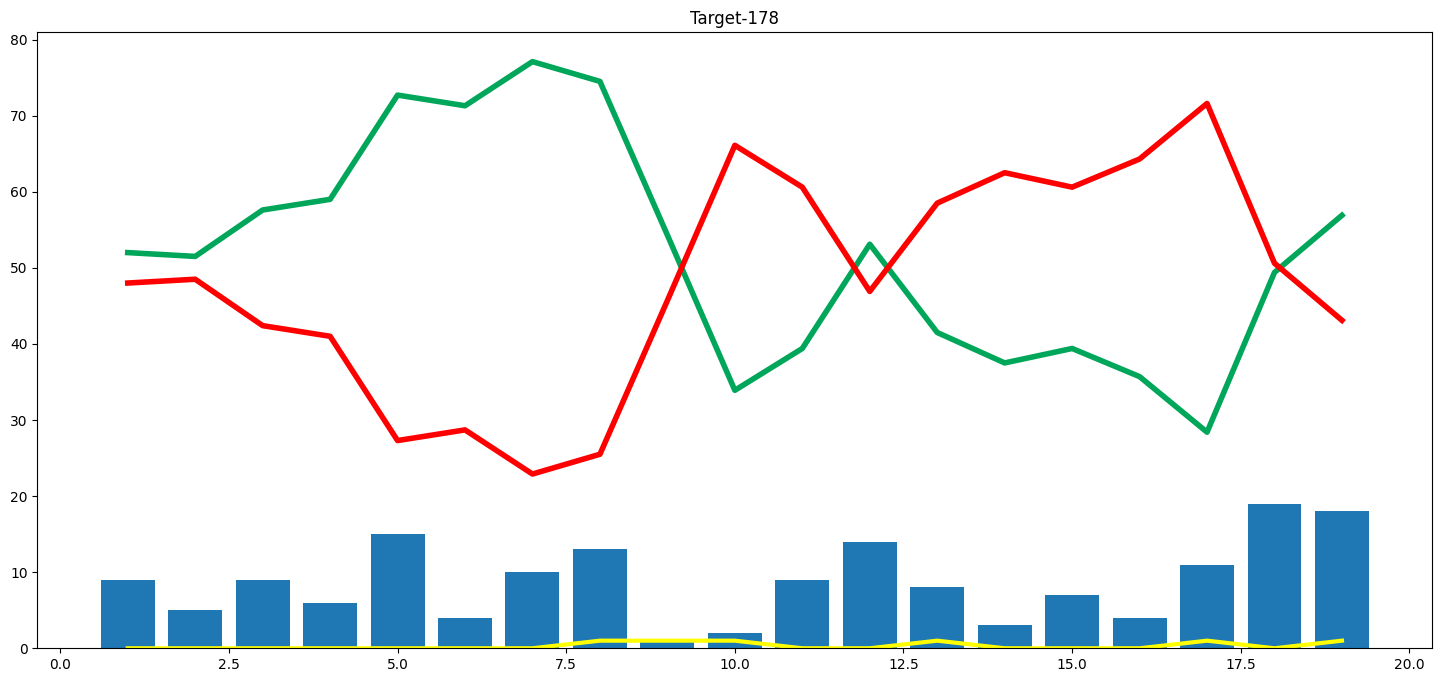

In [ ]:
temp_df,target = match_progression(delivery_df,7,pipe)

plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'],color='yellow', linewidth=3)
plt.plot(temp_df['end_of_over'], temp_df['win'],color='#00a65a', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'],color='red', linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))

## IPL PRediction - user interface

In [ ]:
def preprocess_input(input_df, known_categories):
    input_df['batting_team'] = pd.Categorical(input_df['batting_team'], categories=known_categories['batting_team'])
    input_df['bowling_team'] = pd.Categorical(input_df['bowling_team'], categories=known_categories['bowling_team'])
    input_df['city'] = pd.Categorical(input_df['city'], categories=known_categories['city'])

    return input_df

print("Enter details for Innings 1:")
print("Available Batting Teams:", final_df['batting_team'].unique())
batting_team = input("Enter Batting Team: ")
print("Available Bowling Teams:", final_df['bowling_team'].unique())
bowling_team = input("Enter Bowling Team: ")
print("Available Cities:", final_df['city'].unique())
city = input("Enter City: ")
runs_scored = int(input("Enter Runs Scored in Innings 1: "))

X_input = pd.DataFrame({'batting_team': [batting_team], 'bowling_team': [bowling_team], 'city': [city], 'runs_left': [runs_scored], 'balls_left': [120], 'wickets': [10], 'total_runs_x': [runs_scored], 'crr': [0], 'rrr': [0]})
X_input_preprocessed = preprocess_input(X_input, known_categories={'batting_team': final_df['batting_team'].unique(), 'bowling_team': final_df['bowling_team'].unique(), 'city': final_df['city'].unique()})

predicted_df = pipe.predict_proba(X_input_preprocessed)
print("Predicted Probabilities for Innings 2:")
print(f"Loss Probability for {bowling_team}", predicted_df[0][0])
print(f"Win Probability for {bowling_team}", predicted_df[0][1])


Enter details for Innings 1:
Available Batting Teams: ['Kolkata Knight Riders' 'Delhi Daredevils' 'Deccan Chargers'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Rajasthan Royals' 'Mumbai Indians' 'Sunrisers Hyderabad'
 'Delhi Capitals']
Enter Batting Team: Chennai Super Kings
Available Bowling Teams: ['Rajasthan Royals' 'Mumbai Indians' 'Delhi Daredevils'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Deccan Chargers' 'Sunrisers Hyderabad'
 'Delhi Capitals']
Enter Bowling Team: Sunrisers Hyderabad
Available Cities: ['Ahmedabad' 'Visakhapatnam' 'Kolkata' 'Johannesburg' 'Bangalore' 'Mumbai'
 'Jaipur' 'Durban' 'Port Elizabeth' 'Delhi' 'Hyderabad' 'Cuttack'
 'Abu Dhabi' 'Bengaluru' 'Dharamsala' 'Chennai' 'Kimberley' 'Chandigarh'
 'Pune' 'Nagpur' 'Mohali' 'Sharjah' 'Raipur' 'Ranchi' 'Centurion' 'Indore'
 'East London' 'Bloemfontein' 'Cape Town']
Enter City: Hyderabad
Enter Runs Scored in Innings 1: 212
Predicted P

In [ ]:
print("Enter details for Innings 1:")
print("Available Batting Teams:", final_df['batting_team'].unique())
batting_team = input("Enter Batting Team: ")
print("Available Bowling Teams:", final_df['bowling_team'].unique())
bowling_team = input("Enter Bowling Team: ")
print("Available Cities:", final_df['city'].unique())
city = input("Enter City: ")
runs_scored = int(input("Enter Runs Scored in Innings 1: "))

X_input = pd.DataFrame({'batting_team': [batting_team], 'bowling_team': [bowling_team], 'city': [city], 'runs_left': [runs_scored], 'balls_left': [120], 'wickets': [10], 'total_runs_x': [runs_scored], 'crr': [0], 'rrr': [0]})
X_input_preprocessed = preprocess_input(X_input, known_categories={'batting_team': final_df['batting_team'].unique(), 'bowling_team': final_df['bowling_team'].unique(), 'city': final_df['city'].unique()})

predicted_df = pipe.predict_proba(X_input_preprocessed)
print("Predicted Probabilities for Innings 2:")
print(f"Loss Probability for {bowling_team}", predicted_df[0][0])
print(f"Win Probability for {bowling_team}", predicted_df[0][1])


Enter details for Innings 1:
Available Batting Teams: ['Kolkata Knight Riders' 'Delhi Daredevils' 'Deccan Chargers'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Rajasthan Royals' 'Mumbai Indians' 'Sunrisers Hyderabad'
 'Delhi Capitals']
Enter Batting Team: Chennai Super Kings
Available Bowling Teams: ['Rajasthan Royals' 'Mumbai Indians' 'Delhi Daredevils'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Deccan Chargers' 'Sunrisers Hyderabad'
 'Delhi Capitals']
Enter Bowling Team: Sunrisers Hyderabad
Available Cities: ['Ahmedabad' 'Visakhapatnam' 'Kolkata' 'Johannesburg' 'Bangalore' 'Mumbai'
 'Jaipur' 'Durban' 'Port Elizabeth' 'Delhi' 'Hyderabad' 'Cuttack'
 'Abu Dhabi' 'Bengaluru' 'Dharamsala' 'Chennai' 'Kimberley' 'Chandigarh'
 'Pune' 'Nagpur' 'Mohali' 'Sharjah' 'Raipur' 'Ranchi' 'Centurion' 'Indore'
 'East London' 'Bloemfontein' 'Cape Town']
Enter City: Chennai
Enter Runs Scored in Innings 1: 212
Predicted Pro

In [ ]:
print("Enter details for Innings 1:")
print("Available Batting Teams:", final_df['batting_team'].unique())
batting_team = input("Enter Batting Team: ")
print("Available Bowling Teams:", final_df['bowling_team'].unique())
bowling_team = input("Enter Bowling Team: ")
print("Available Cities:", final_df['city'].unique())
city = input("Enter City: ")
runs_scored = int(input("Enter Runs Scored in Innings 1: "))

X_input = pd.DataFrame({'batting_team': [batting_team], 'bowling_team': [bowling_team], 'city': [city], 'runs_left': [runs_scored], 'balls_left': [120], 'wickets': [10], 'total_runs_x': [runs_scored], 'crr': [0], 'rrr': [0]})
X_input_preprocessed = preprocess_input(X_input, known_categories={'batting_team': final_df['batting_team'].unique(), 'bowling_team': final_df['bowling_team'].unique(), 'city': final_df['city'].unique()})

predicted_df = pipe.predict_proba(X_input_preprocessed)
print("Predicted Probabilities for Innings 2:")
print(f"Loss Probability for {bowling_team}", predicted_df[0][0])
print(f"Win Probability for {bowling_team}", predicted_df[0][1])


Enter details for Innings 1:
Available Batting Teams: ['Kolkata Knight Riders' 'Delhi Daredevils' 'Deccan Chargers'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Rajasthan Royals' 'Mumbai Indians' 'Sunrisers Hyderabad'
 'Delhi Capitals']
Enter Batting Team: Chennai Super Kings
Available Bowling Teams: ['Rajasthan Royals' 'Mumbai Indians' 'Delhi Daredevils'
 'Chennai Super Kings' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Deccan Chargers' 'Sunrisers Hyderabad'
 'Delhi Capitals']
Enter Bowling Team: Sunrisers Hyderabad
Available Cities: ['Ahmedabad' 'Visakhapatnam' 'Kolkata' 'Johannesburg' 'Bangalore' 'Mumbai'
 'Jaipur' 'Durban' 'Port Elizabeth' 'Delhi' 'Hyderabad' 'Cuttack'
 'Abu Dhabi' 'Bengaluru' 'Dharamsala' 'Chennai' 'Kimberley' 'Chandigarh'
 'Pune' 'Nagpur' 'Mohali' 'Sharjah' 'Raipur' 'Ranchi' 'Centurion' 'Indore'
 'East London' 'Bloemfontein' 'Cape Town']
Enter City: Chennai
Enter Runs Scored in Innings 1: 140
Predicted Pro

In [ ]:
predicted_df

array([[0.15480929, 0.84519071]])